Assignment 1.2 by Yidi Wang
3/31/2018
Build a Jupyter Notebook to do the following:
a.	Download the dataset into pandas dataframe
b.	Remove ‘1M’ column and use the date from 1998-2016 (we will leave 2017-2018 data out for now)
c.	Construct series of daily differences
d.	Compute correlations and volatilities among the series (using level data)
e.	Compute correlations and volatilities among the series (using daily differences)
f.	Plot the volatility curves computed in 2d & 2e


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# a. Download the dataset into pandas dataframe. I convert the xml original data to csv data with the help of online converter.
data = pd.read_csv("D:/Tandon 2nd Semester/Fixed Income Quantitative Trading/Homework 1/data.csv")

In [3]:
# b. Remove '1M' column.
# Drop all the useless columns and just keep columns with real number.
data1 = data.dropna(axis=1,how='all') 

In [4]:
# Select column by its name in the csv file.
data2 = data1.loc[:, ['content/properties/NEW_DATE/__text', 
                      'content/properties/BC_3MONTH/__text',
                      'content/properties/BC_6MONTH/__text',
                      'content/properties/BC_1YEAR/__text',
                      'content/properties/BC_2YEAR/__text',
                      'content/properties/BC_3YEAR/__text',
                      'content/properties/BC_5YEAR/__text',
                      'content/properties/BC_7YEAR/__text',
                      'content/properties/BC_10YEAR/__text',
                      'content/properties/BC_20YEAR/__text',
                      'content/properties/BC_30YEAR/__text',]]

In [5]:
# Rename the columns in a simple way.
data2.columns = ['Date','3-Month','6-Month','1-Year','2-Year','3-Year','5-Year','7-Year','10-Year','20-Year','30-Year']

In [6]:
# Modify the dataframe with the index of data date.
data2.set_index('Date')

,3-Month,6-Month,1-Year,2-Year,3-Year,5-Year,7-Year,10-Year,20-Year,30-Year
Date,,,,,,,,,,
1990-01-02T00:00:00,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03T00:00:00,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04T00:00:00,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05T00:00:00,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08T00:00:00,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1990-01-09T00:00:00,7.80,7.82,7.78,7.91,7.94,7.92,8.05,8.02,NaN,8.10
1990-01-10T00:00:00,7.75,7.78,7.77,7.91,7.95,7.92,8.00,8.03,NaN,8.11
1990-01-11T00:00:00,7.80,7.80,7.77,7.91,7.95,7.94,8.01,8.04,NaN,8.11
1990-01-12T00:00:00,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,NaN,8.17


In [7]:
# b. Select the data from 1998-2016.
data3 = data2.iloc[2002:6757]

In [8]:
# Get a standard overview of the dataframe.
data3

,Date,3-Month,6-Month,1-Year,2-Year,3-Year,5-Year,7-Year,10-Year,20-Year,30-Year
2002,1998-01-02T00:00:00,5.32,5.40,5.46,5.59,5.62,5.63,5.68,5.67,5.94,5.86
2003,1998-01-05T00:00:00,5.23,5.32,5.35,5.47,5.47,5.46,5.52,5.52,5.82,5.74
2004,1998-01-06T00:00:00,5.22,5.30,5.30,5.39,5.42,5.41,5.49,5.49,5.80,5.73
2005,1998-01-07T00:00:00,5.23,5.30,5.31,5.42,5.45,5.45,5.55,5.55,5.88,5.80
2006,1998-01-08T00:00:00,5.13,5.20,5.20,5.31,5.33,5.34,5.46,5.49,5.82,5.75
2007,1998-01-09T00:00:00,5.05,5.11,5.08,5.17,5.20,5.22,5.37,5.40,5.77,5.71
2008,1998-01-12T00:00:00,5.12,5.13,5.13,5.20,5.21,5.24,5.38,5.39,5.76,5.70
2009,1998-01-13T00:00:00,5.17,5.16,5.17,5.25,5.25,5.28,5.42,5.41,5.76,5.71
2010,1998-01-14T00:00:00,5.18,5.17,5.19,5.29,5.30,5.33,5.45,5.45,5.79,5.74
2011,1998-01-15T00:00:00,5.13,5.15,5.19,5.29,5.29,5.34,5.46,5.48,5.81,5.74


In [9]:
# Get the prepared data.
data_prepared = data3.set_index('Date')

In [10]:
# c. Construct the daily difference. 
data_difference = data_prepared.diff()

In [11]:
data_difference

,3-Month,6-Month,1-Year,2-Year,3-Year,5-Year,7-Year,10-Year,20-Year,30-Year
Date,,,,,,,,,,
1998-01-02T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05T00:00:00,-0.09,-0.08,-0.11,-0.12,-0.15,-0.17,-0.16,-0.15,-0.12,-0.12
1998-01-06T00:00:00,-0.01,-0.02,-0.05,-0.08,-0.05,-0.05,-0.03,-0.03,-0.02,-0.01
1998-01-07T00:00:00,0.01,0.00,0.01,0.03,0.03,0.04,0.06,0.06,0.08,0.07
1998-01-08T00:00:00,-0.10,-0.10,-0.11,-0.11,-0.12,-0.11,-0.09,-0.06,-0.06,-0.05
1998-01-09T00:00:00,-0.08,-0.09,-0.12,-0.14,-0.13,-0.12,-0.09,-0.09,-0.05,-0.04
1998-01-12T00:00:00,0.07,0.02,0.05,0.03,0.01,0.02,0.01,-0.01,-0.01,-0.01
1998-01-13T00:00:00,0.05,0.03,0.04,0.05,0.04,0.04,0.04,0.02,0.00,0.01
1998-01-14T00:00:00,0.01,0.01,0.02,0.04,0.05,0.05,0.03,0.04,0.03,0.03


In [12]:
# d. Compute correlations and volatilities among the series (using level data).
data_prepared.std()

3-Month    2.100867
6-Month    2.125534
1-Year     2.072415
2-Year     1.997175
3-Year     1.881481
5-Year     1.660711
7-Year     1.517478
10-Year    1.327459
20-Year    1.262964
30-Year    1.141953
dtype: float64

In [13]:
data_prepared.corr()

,3-Month,6-Month,1-Year,2-Year,3-Year,5-Year,7-Year,10-Year,20-Year,30-Year
3-Month,1.000000,0.998474,0.994831,0.981020,0.965991,0.930395,0.897358,0.858808,0.777356,0.836837
6-Month,0.998474,1.000000,0.998064,0.985813,0.971125,0.935369,0.901603,0.862994,0.779952,0.837599
1-Year,0.994831,0.998064,1.000000,0.993338,0.981841,0.950010,0.918233,0.880892,0.800086,0.847686
2-Year,0.981020,0.985813,0.993338,1.000000,0.996518,0.975633,0.950672,0.916565,0.842489,0.874898
3-Year,0.965991,0.971125,0.981841,0.996518,1.000000,0.989703,0.971020,0.941514,0.874408,0.894447
5-Year,0.930395,0.935369,0.950010,0.975633,0.989703,1.000000,0.994435,0.977402,0.927013,0.932308
7-Year,0.897358,0.901603,0.918233,0.950672,0.971020,0.994435,1.000000,0.992506,0.957795,0.958027
10-Year,0.858808,0.862994,0.880892,0.916565,0.941514,0.977402,0.992506,1.000000,0.982792,0.980511
20-Year,0.777356,0.779952,0.800086,0.842489,0.874408,0.927013,0.957795,0.982792,1.000000,0.994971
30-Year,0.836837,0.837599,0.847686,0.874898,0.894447,0.932308,0.958027,0.980511,0.994971,1.000000


In [14]:
# e. Compute correlations and volatilities among the series (using daily differences)
data_difference.std()

3-Month    0.051948
6-Month    0.041469
1-Year     0.041751
2-Year     0.054433
3-Year     0.058449
5-Year     0.062394
7-Year     0.062952
10-Year    0.059746
20-Year    0.056070
30-Year    0.054872
dtype: float64

In [15]:
data_difference.corr()

,3-Month,6-Month,1-Year,2-Year,3-Year,5-Year,7-Year,10-Year,20-Year,30-Year
3-Month,1.000000,0.767921,0.595915,0.367397,0.329247,0.274581,0.232599,0.205383,0.156063,0.139239
6-Month,0.767921,1.000000,0.819384,0.576529,0.532568,0.461739,0.405949,0.369554,0.299902,0.257626
1-Year,0.595915,0.819384,1.000000,0.810699,0.762512,0.683485,0.619514,0.571969,0.482837,0.410516
2-Year,0.367397,0.576529,0.810699,1.000000,0.951802,0.887326,0.824188,0.769853,0.663140,0.588832
3-Year,0.329247,0.532568,0.762512,0.951802,1.000000,0.944469,0.893232,0.845369,0.743122,0.676943
5-Year,0.274581,0.461739,0.683485,0.887326,0.944469,1.000000,0.967855,0.936032,0.852927,0.800068
7-Year,0.232599,0.405949,0.619514,0.824188,0.893232,0.967855,1.000000,0.971868,0.914288,0.872325
10-Year,0.205383,0.369554,0.571969,0.769853,0.845369,0.936032,0.971868,1.000000,0.950530,0.921481
20-Year,0.156063,0.299902,0.482837,0.663140,0.743122,0.852927,0.914288,0.950530,1.000000,0.976995
30-Year,0.139239,0.257626,0.410516,0.588832,0.676943,0.800068,0.872325,0.921481,0.976995,1.000000


Text(0,0.5,'The value of volatility.')

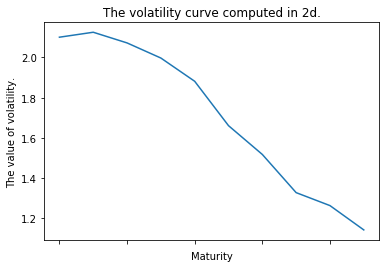

In [16]:
# f. Plot the volatility curves computed in 2d & 2e
data_prepared_std = data_prepared.std()
data_prepared_std.plot()
plt.title('The volatility curve computed in 2d.')
plt.xlabel('Maturity')
plt.ylabel('The value of volatility.')

Text(0,0.5,'The value of volatility.')

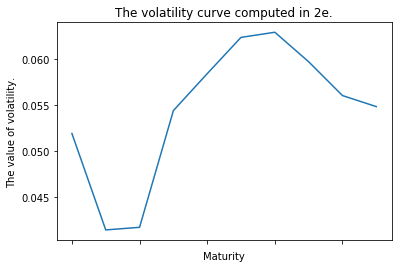

In [17]:
data_difference_std = data_difference.std()
data_difference_std.plot()
plt.title('The volatility curve computed in 2e.')
plt.xlabel('Maturity')
plt.ylabel('The value of volatility.')